##### Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##### Import dataset

In [3]:
dataset = pd.read_excel("D:/SPRING 2022-23/ML/FINAL_PROJECT/cancer patient data sets.xlsx")
dataset.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


##### Check the instances & attributes count of dataset

In [4]:
print(dataset.shape)

(1000, 25)


##### Describe the dataset in transpose

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,37.174,12.005493,14.0,27.75,36.0,45.0,73.0
Gender,1000.0,1.402,0.490547,1.0,1.00,1.0,2.0,2.0
Air Pollution,1000.0,3.840,2.030400,1.0,2.00,3.0,6.0,8.0
Alcohol use,1000.0,4.563,2.620477,1.0,2.00,5.0,7.0,8.0
Dust Allergy,1000.0,5.165,1.980833,1.0,4.00,6.0,7.0,8.0
OccuPational Hazards,1000.0,4.840,2.107805,1.0,3.00,5.0,7.0,8.0
Genetic Risk,1000.0,4.580,2.126999,1.0,2.00,5.0,7.0,7.0
chronic Lung Disease,1000.0,4.380,1.848518,1.0,3.00,4.0,6.0,7.0
Balanced Diet,1000.0,4.491,2.135528,1.0,2.00,4.0,7.0,7.0
Obesity,1000.0,4.465,2.124921,1.0,3.00,4.0,7.0,7.0


##### Check for null value

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

No null value found

##### Remove irrelevant column

In [7]:
dataset.drop(['Patient Id'], axis=1, inplace=True)

In [8]:
dataset.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


##### Converting categorical data into numerical (Level column)

In [9]:
def converter(column):
    if column == 'Low':
        return 0
    elif column == 'Medium':
        return 1
    else:
        return 2
    
dataset['Level']=dataset['Level'].apply(converter)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

##### Checking for missing value

In [11]:
dataset.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

No missing value found

##### Plot boxplot to view the outliers

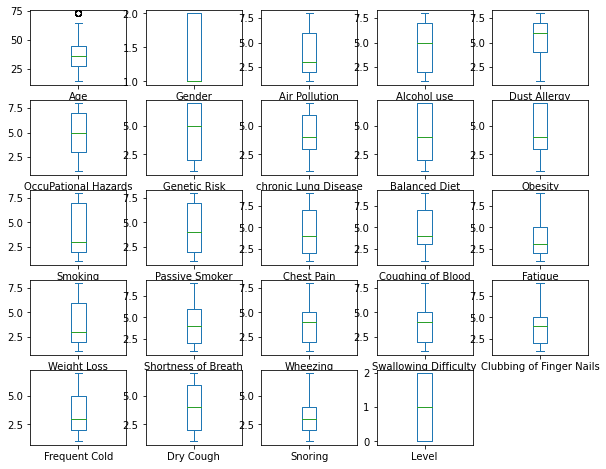

In [13]:
columns=list(dataset.columns)
dataset[columns].plot(kind="box", subplots="True", layout=(5, 5) ,figsize=(10,8))
plt.show()

##### Capturing the outlier using IQR for age

In [14]:
X=dataset.Age
Q1=np.quantile(X, .25)
Q3=np.quantile(X, .75)
IQR=Q3-Q1
Lb=Q1-(1.5*IQR)
Ub=Q3+(1.5*IQR)
Outliers=[]
for i in X:
    if (i<Lb or i> Ub):
        Outliers.append(i)
    
print("----------Outliers in variable 'Age' for the given dataset----------")
print(Outliers)

----------Outliers in variable 'Age' for the given dataset----------
[73, 73, 73, 73, 73, 73, 73, 73, 73, 73]


##### Remove outliers for age

In [15]:
for ele in Outliers:
    dataset.drop(dataset[(dataset['Age']==ele)].index, inplace=True)

##### Plot histogram to check the data distribution

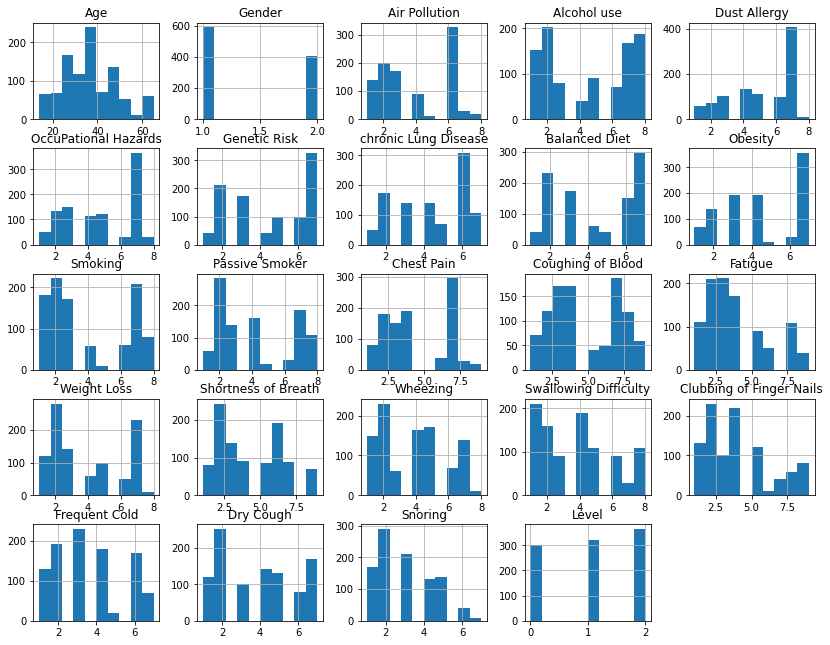

In [16]:
dataset.hist(figsize=(14,11))
plt.show()

##### Plot correlation graph (Heat map)

In [38]:
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

##### Select the highly correlated columns with our target variable - Level

In [18]:
df_corr = dataset.corr()['Level'][:-1]
corr = df_corr[abs(df_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(corr), corr))

There is 13 strongly correlated values with target:
Obesity                 0.827918
Coughing of Blood       0.782173
Alcohol use             0.720249
Dust Allergy            0.714826
Balanced Diet           0.708628
Passive Smoker          0.704315
Genetic Risk            0.703423
OccuPational Hazards    0.673353
Chest Pain              0.645868
Air Pollution           0.637549
Fatigue                 0.625194
chronic Lung Disease    0.610594
Smoking                 0.527875
Name: Level, dtype: float64


In [19]:
corr_df=pd.DataFrame(corr)
list(corr_df.index)

['Obesity',
 'Coughing of Blood',
 'Alcohol use',
 'Dust Allergy',
 'Balanced Diet',
 'Passive Smoker',
 'Genetic Risk',
 'OccuPational Hazards',
 'Chest Pain',
 'Air Pollution',
 'Fatigue',
 'chronic Lung Disease',
 'Smoking']

##### Drop some other columns and creating feature dataframe(x) and lable dataframe(y)

In [20]:
impColms=list(corr_df.index)
x=dataset.copy()

for i in dataset.columns:
    if i not in impColms:
        x.drop([i],axis=1,inplace=True)

y=dataset['Level']

In [21]:
print(x.shape)
print(y.shape)

(990, 13)
(990,)


##### Normalize numerical features so that each feature has mean 0 and variance 1

In [22]:
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(x)
X_scaled

array([[-0.89787225, -0.20867982, -0.07875426, ..., -1.06222082,
        -0.351619  , -0.37899803],
       [-0.40677085, -1.35007771, -0.07875426, ..., -1.06222082,
        -0.76163409, -1.26601468],
       [ 0.08433054,  0.17178615,  0.4242568 , ..., -0.18880005,
         1.28844135,  1.83854361],
       ...,
       [ 0.08433054,  0.17178615,  0.4242568 , ..., -0.18880005,
         1.28844135,  1.83854361],
       [ 1.06653334,  1.31318404,  0.92726785, ...,  1.12133111,
         1.69845643, -0.37899803],
       [ 1.06653334,  0.17178615,  0.4242568 , ..., -0.18880005,
         1.28844135,  1.83854361]])

##### Split data into train & test sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=132)

##### Implement cross-validation using Grid Search

In [24]:
# Tuning eta0, max_iter, and alpha parameters

model = Pipeline([
        ('balancing', SMOTE(random_state = 107)),
        ('classification', SGDClassifier(loss = 'log', penalty = 'elasticnet', random_state = 38))
    ])
grid_param = {'classification__eta0': [.001,.01,.1,1,10,100], 'classification__max_iter' : [100,500,1000], 'classification__alpha': [.001, .01,.1, 1,10,100], 'classification__l1_ratio': [0,0.3,0.5,0.7,1]}

gd_sr = GridSearchCV(estimator=model, param_grid=grid_param, scoring='accuracy', cv=5)

gd_sr.fit(X_train,y_train)

best_parameters = gd_sr.best_params_
print("Best parameters: ", best_parameters)

best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print("Best result: ", best_result)

Best parameters:  {'classification__alpha': 0.001, 'classification__eta0': 0.001, 'classification__l1_ratio': 1, 'classification__max_iter': 100}
Best result:  0.9217100549319323


In [27]:
y_pred_CV = gd_sr.predict(X_test)

In [28]:
print('Accuracy: {}'.format(gd_sr.score(X_test, y_test)*100),"%")

Accuracy: 93.43434343434343 %


##### Generating confusion matrix & print the classification report

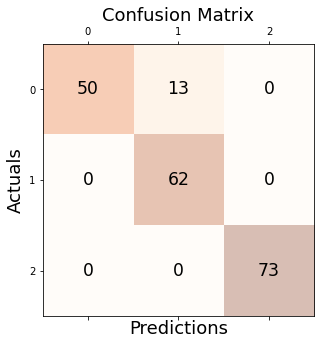

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        63
           1       0.83      1.00      0.91        62
           2       1.00      1.00      1.00        73

    accuracy                           0.93       198
   macro avg       0.94      0.93      0.93       198
weighted avg       0.95      0.93      0.93       198



In [30]:
mat_gs=confusion_matrix(y_test,y_pred_CV)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mat_gs, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(mat_gs.shape[0]):
    for j in range(mat_gs.shape[1]):
        ax.text(x=j, y=i,s=mat_gs[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print(classification_report(y_test, y_pred_CV))

#### Graph of cross validation

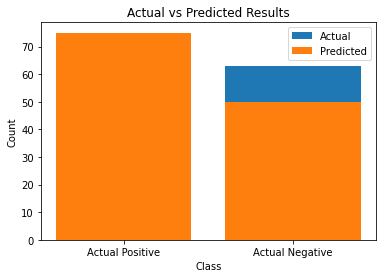

In [31]:
mat_gs = confusion_matrix(y_test, y_pred_CV)

# Extracting the true positive (TP), false positive (FP), true negative (TN), and false negative (FN) values from the confusion matrix
TP = mat_gs[1][1]
FP = mat_gs[0][1]
TN = mat_gs[0][0]
FN = mat_gs[1][0]

# Creating a bar plot to visualize the actual vs predicted results
x = np.array(['Actual Positive', 'Actual Negative'])
y = np.array([TP+FN, FP+TN])
y_pred = np.array([TP+FP, FN+TN])

plt.bar(x, y, label='Actual')
plt.bar(x, y_pred, label='Predicted')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted Results')
plt.legend()
plt.show()

### Decision Tree

In [32]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train,y_train)

In [33]:
y_pred_DT = DT.predict(X_test)

In [34]:
print('Accuracy: {}'.format(DT.score(X_test, y_test)*100),"%")

Accuracy: 100.0 %


##### Generating confusion matrix & print the classification report

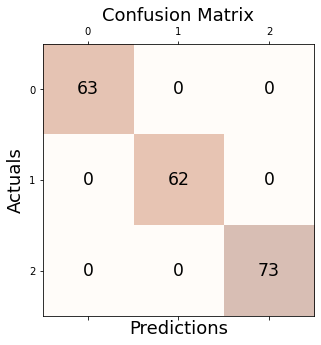

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        73

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198



In [35]:
mat_dt=confusion_matrix(y_test,y_pred_DT)
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(mat_dt, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(mat_dt.shape[0]):
    for j in range(mat_dt.shape[1]):
        ax.text(x=j, y=i,s=mat_dt[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

print(classification_report(y_test, y_pred_DT))

#### Graph for Decision Tree

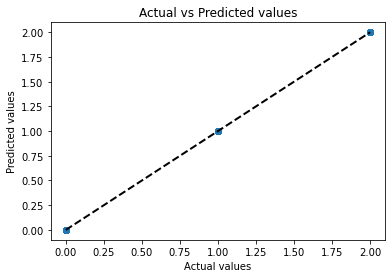

In [36]:
y_actual = y_test
y_pred = y_pred_DT

# create scatter plot
plt.scatter(y_actual, y_pred)
plt.plot([0, max(y_actual)], [0, max(y_actual)], 'k--', lw=2) # plot diagonal line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.show()